# Hands-on lattice calculations for the AUTH 2024 Accelerator Phyiscs course
*T. Prebibaj, F. Asvesta, Y. Papaphilippou*

---

# Part III: Single particle dynamics in periodic systems.

Exercises for periodic systems, like an accelerator ring.

---

In [4]:
# Import custom tracking functions and useful libraries
from tracking_library import *
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Transverse dynamics in a ring

- An **accelerator ring** can be viewed as a periodic beamline: it consists of a number of cells/elements which the particles interact repeatedly turn-by-turn. In real accelerators, the particles can perform thousands, millions of tens of millions of turns. Thus, the stability of the particle motion in the **accelerator lattice** (which is the sequence of the accelerator elements) is crucial. 

- The phase space provides useful information on the dyanmics of the particle motion. 

### Exercise 11: phase space in a stable ring

- Model a stable ring consisting of 16 FODO cells and a total circumference of 160 meters. Each FODO cell should have one focusing and one defocusing quadrupole. Select $f=0.8L$, where L is the length of one of the two equal drifts of each cell.  

- Track a single particle with $x_0=0$ and $x'_0=1$ mrad for 100 turns. Plot the particle trajectory turn-by-turn. 

- Plot the trace of the particle in the phase space at s=0 and s=55 m for the 100 turns. 


In [2]:
# code your solution here...

# Modelling the ring
C = 160 # circumference in meters
Lcell = C/16 # length of one FODO cell in meters
L = Lcell/2 # length of one drift in the fodo cell
f = 0.8*L 
basic_cell = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)
myRing = basic_cell*16

# Initial particle coordinates
X_0 = np.array([[0],
                [1e-3]])

# Tracking the particle for 100 turns
nturns = 100
transported_particle_turnbyturn = {}
transported_particle_turnbyturn[0] = transportParticles(X_0, myRing, s_0=0)
for turn in range(1,nturns+1):
    X_1 = np.array([transported_particle_turnbyturn[turn-1]['x'][-1],
                    transported_particle_turnbyturn[turn-1]['xp'][-1]])
    transported_particle_turnbyturn[turn] = transportParticles(X_1, myRing, s_0=0)

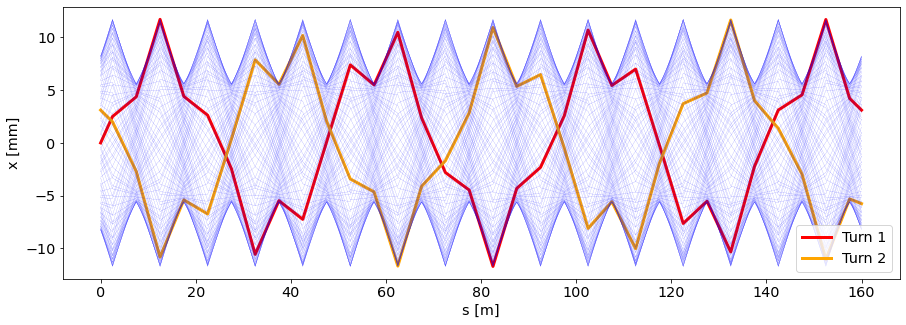

In [5]:
# code your solution here...

plt.plot(transported_particle_turnbyturn[0]['s'], transported_particle_turnbyturn[0]['x']*1e3, c='red', ls='-', linewidth=3, label='Turn 1')
plt.plot(transported_particle_turnbyturn[1]['s'], transported_particle_turnbyturn[1]['x']*1e3, c='orange', ls='-', linewidth=3, label='Turn 2')
for i in range(nturns):
    plt.plot(transported_particle_turnbyturn[i]['s'], transported_particle_turnbyturn[i]['x']*1e3, c='blue', ls='-', linewidth=0.1)
plt.xlabel('s [m]')
plt.ylabel('x [mm]')
plt.legend(loc=0)

Text(0.5, 1.0, 'Phase space at s=55 m')

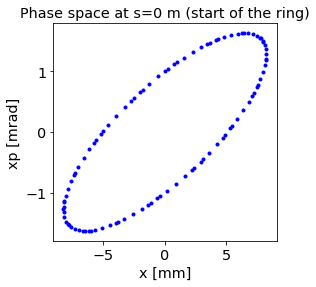

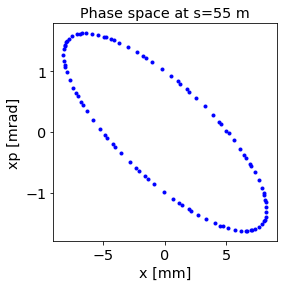

In [7]:
# code your solution here...

# Phase space at s=0
index_of_s = np.where(transported_particle_turnbyturn[0]['s'] == 0.0)[0][0]
plt.figure(figsize=(4,4))
for i in range(nturns):
    plt.plot(transported_particle_turnbyturn[i]['x'][index_of_s]*1e3, 
             transported_particle_turnbyturn[i]['xp'][index_of_s]*1e3, 
             '.', c='blue')
plt.xlabel('x [mm]')
plt.ylabel('xp [mrad]')
plt.title('Phase space at s=0 m (start of the ring)')

# Phase space at s=55
index_of_s = np.where(transported_particle_turnbyturn[0]['s'] == 55.0)[0][0]
plt.figure(figsize=(4,4))
for i in range(nturns):
    plt.plot(transported_particle_turnbyturn[i]['x'][index_of_s]*1e3, 
             transported_particle_turnbyturn[i]['xp'][index_of_s]*1e3, 
             '.', c='blue')
plt.xlabel('x [mm]')
plt.ylabel('xp [mrad]')
plt.title('Phase space at s=55 m')

- The particle performs turn-by-turn a certain number of betatron oscillations. This number is known as the **betatron tune $Q_x$** (*lecture II slide 35*).

- In the phase space, the particle turn-after-turn stays on an ellipse (*lecture II slides 30-31*). This ellipse is parametrized as:

    \begin{equation}
    \gamma x^2 + 2\alpha xx' + \beta x'^2 = \epsilon
    \end{equation}

    where $(\alpha, \beta, \gamma)$ are known as the **Twiss parameters** and $\epsilon$ as **single particle emittance**. The phase space ellipse represents the betatron oscillations around the fixed point, here at $(x,x')=(0,0)$. Remember that the parametrization of the betatron motion is (*lecture II slide 29*): $x(s) = \sqrt{\epsilon \beta(s)} cos(\psi(s) + \psi_0)$.

- The area enclosed in these ellipses is $A=2\pi \cdot \epsilon$. It can be shown that the single particle emittance is an invariant of motion (Courant-Snyder invariant - *lecture II slide 30*).

- The Twiss parameters (which define the orientation of the ellipses) are s-dependent: they depend on the lattice properties (arrangement and strength of quadrupoles). 

- The equivalent matrix ($M_{eq.}$) of an accelerator ring is known as the **one-turn-map** and is parametrized using the Twiss parameters (*lecture II slide 34*) as:

    \begin{equation}
    M = 
        \left[
        \begin{array}{cc}
        \cos(\mu) + \alpha_0 \sin(\mu)  & \beta_0 \sin(\mu)\\
        - \gamma_0 \sin(\mu) & \cos(\mu) - \alpha_0 \sin(\mu)
        \end{array}
        \right]
    \end{equation}

    where $\alpha_0$, $\beta_0$, $\gamma_0$ are the initial (and final) Twiss values and $\mu=2\pi Q_x$ is the phase advance of the associated beamline or ring. From this expression, one can extract the periodic solution of any beamline, assuming it exists.

    Note: Since the determinant of $M$ must be one, then one can verify that the trace of the matrix R must be $|\mathrm{Tr}(M)| \le 2$ to ensure the existence of such periodic solution.


### Exercise 12: optics, trace and single particle emittance of the ring
 
- Compute the Twiss parameters at the beginning of the ring for the lattice of exercise 11 and also the betatron tune. 

- Calculate the trace of the one-turn-map and verify that it is stable. 

- Calculate the single particle emittance from the twiss parameters. 

In [8]:
# code your solution here...

# first, compute the equivalent "One-Turn-Map", and extract its matrix:
OTM = getEquivalentElement(myRing)
R = OTM[0]['matrix']

# all relevant Twiss parameters can be extrcted from the matrix:
mu = np.arccos(0.5*(R[0,0]+R[1,1]))
if (R[0,1]<0): 
    mu = 2*np.pi-mu
Qx = mu/(2*np.pi)
betax = R[0,1]/np.sin(mu)
alphax = (0.5*(R[0,0]-R[1,1]))/np.sin(mu)
gammax = (1+alphax**2)/betax

print('Qx =', Qx)
print('beta_x =', betax)
print('alpha_x =', alphax)
print('gamma_x =', gammax)

Qx = 0.4384166625323947
beta_x = 8.246599920961968
alpha_x = -1.2810252304406948
gamma_x = 0.3202563076101743


> Note: the optics (twiss values) are intependent of the particle coordinates: they are an intrinsic property of the lattice.

In [9]:
# code your solution here...

trace = np.trace(R)
print('Absolute value of trace of the One-Turn-Map:', abs(trace))

Absolute value of trace of the One-Turn-Map: 1.8521365701112402


In [10]:
# code your solution here...

x = X_0[0][0]
xp = X_0[1][0]
emittance = gammax*x**2 + 2*alphax*x*xp + betax*xp**2
print('Emittance of the particle [mm mrad]:', emittance*1e6)

Emittance of the particle [mm mrad]: 8.246599920961968




- These calculations are very important so we will put them in two functions named `twiss` and `particle_emittance`:

In [11]:
def twiss(beamline):
    '''
    Computes and returns the closed solution (if it exist!) Tune (Q) and Twiss parameters 
    beta, alpha, gamma of the given beamline.
    '''

    # first, compute the equivalent "One-Turn-Map", and extract its matrix:
    OTM = getEquivalentElement(beamline)
    R = OTM[0]['matrix']
    
    # check that this matrix is stable:
    trace = np.trace(R)
    if np.abs(trace) > 2:
        raise ValueError('This beamline is not stable!')
    
    # all relevant Twiss parameters can be extrcted from the matrix:
    mu = np.arccos(0.5*(R[0,0]+R[1,1]))
    if (R[0,1]<0): 
        mu = 2*np.pi-mu
    Q = mu/(2*np.pi)
    beta = R[0,1]/np.sin(mu)
    alpha = (0.5*(R[0,0]-R[1,1]))/np.sin(mu)
    gamma = (1+alpha**2)/beta
    
    return Q, beta, alpha, gamma

def particle_emittance(x, xp, beta, alpha):
    '''Returns the single particle emittance for a given 
       x, xp particle coordinates and assumed beta and alpha parameters
    '''
    # compute gamma
    gamma = (alpha**2 + 1)/beta
    # compute and return the associated single particle emittance
    epsilon = gamma*x**2 + 2*alpha*x*xp + beta*xp**2
    return epsilon

### Exercise 13: stability of the ring

In the ring of Exercise 11, vary the $f$ from $1$ m (very strong focusing) to $15$ m (very weak focusing) and find the values of which the ring permits stable oscillations based on the condition (i.e. $|Tr(R)| \le 2$). Use the `get_trace(beamline)` function defined below. Plot the Tr(R) for the different ratios of f/L.

In [12]:
def get_trace(beamline):
    '''
    Computes and returns the trace of the equivalent "One-Turn-Map" of the given beamline.
    '''
    
    # first, compute the equivalent "One-Turn-Map", and extract its matrix:
    OTM = getEquivalentElement(beamline)
    R = OTM[0]['matrix']
    
    # check that this matrix is stable:
    trace = np.trace(R)

    return trace

(0.0, 3.0)

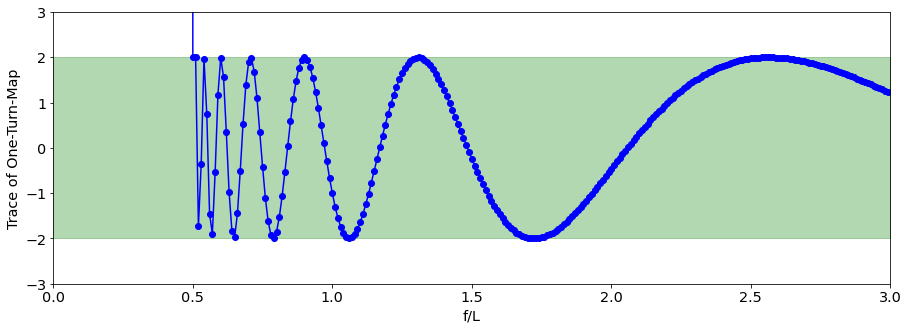

In [13]:
# code your solution here...

# We redefine the ring with the new f value
L = 5
frange = np.arange(1, 15, 0.05)
traces = []
for f in frange:
    FODO = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)
    myRing = FODO*16
    traces.append(get_trace(myRing))

plt.plot(frange/L, traces, 'o-', color='blue')
plt.xlabel('f/L')
plt.ylabel('Trace of One-Turn-Map')
plt.gca().fill_between([0,3], [-2,-2],  [2,2],color='green', alpha=0.3)
plt.ylim(-3,3)
plt.xlim(0,3)

- It can be shown (*lecture II slide 36*), that the Twiss functions from $s=s_1$ to $s=s_2$ can be calculated as:

    \begin{equation}
    \left(
    \begin{array}{c}
    \beta \\
    \alpha \\
    \gamma
    \end{array}
    \right)_{s_1} = 
    
    \left[
    \begin{array}{c}
    m_{11}^2 & -2m_{11}m_{12} & m_{12}^2\\
    -m_{11}m_{21} & m_{11}m_{22} + m_{12}m_{21} & -m_{22}m_{12}\\
    m_{21}^2 & -2m_{22}m_{21} & m_{22}^2\\
    \end{array}
    \right]
    
    \left(
    \begin{array}{c}
    \beta \\
    \alpha \\
    \gamma
    \end{array}
    \right)_{s_2},
    \end{equation}

    where:
    
    \begin{equation}
    M= \left[
    \begin{array}{c}
    m_{11}\quad m_{12}\\
    m_{21}\quad m_{22}
    \end{array}
    \right]
    \end{equation}

    if the transport matrix from $s=s_1$ to $s=s_2$.  We define this in the `transport_optics` function below:

In [14]:
def transport_optics(beta1,alpha1,gamma1, M):
    '''
    This function computes the Twiss parameters of a beamline after 
    the transport of a beamline with Twiss parameters beta1, alpha1, gamma1
    through a matrix M.
    '''
    # compute the new Twiss parameters
    beta2 = M[0,0]**2*beta1 -2*M[0,0]*M[0,1]*alpha1 + M[0,1]**2*gamma1
    alpha2 = -M[0,0]*M[1,0]*beta1 + (M[0,0]*M[1,1] + M[0,1]*M[1,0])*alpha1 - M[0,1]*M[1,1]*gamma1
    gamma2 = M[1,0]**2*beta1 -2*M[1,0]*M[1,1]*alpha1 + M[1,1]**2*gamma1
    
    return beta2, alpha2, gamma2

### Exercise 14: transport of Twiss functions

Find and plot the Twiss functions of the ring of Exercise 11 all around the ring.

In [15]:
# code your solution here...

# Modelling the ring of Exercise 11
C = 160 # circumference in meters
Lcell = C/16 # length of one FODO cell in meters
L = Lcell/2 # length of one drift in the fodo cell
f = 0.8*L # based on the stability diagram above
basic_cell = 5*D(L/10) + Q(f) + 10*D(L/10) + Q(-f) + 5*D(L/10)
myRing = basic_cell*16

# Optics at the beginning of the ring
Qx,beta0,alpha0,gamma0 = twiss(myRing)

betas = [beta0]
alphas = [alpha0]
gammas = [gamma0]
s = [0]
for i,element in enumerate(myRing):
    M = element['matrix']
    beta, alpha, gamma = transport_optics(betas[i], alphas[i], gammas[i], M)
    betas.append(beta)
    alphas.append(alpha)
    gammas.append(gamma)
    s.append(s[-1]+element['length'])

Text(0.5, 0, 's [m]')

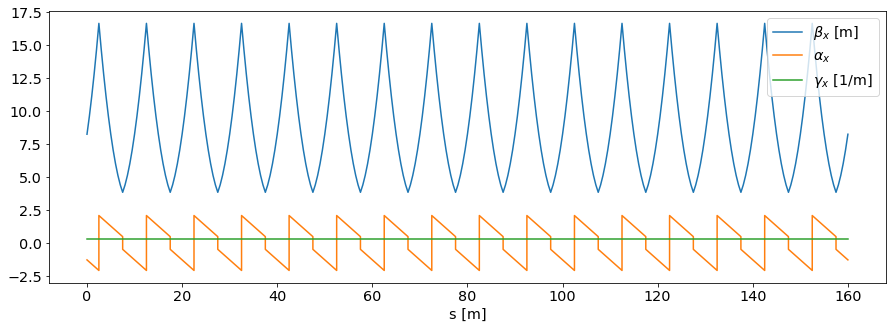

In [17]:
# code your solution here...

plt.plot(s,betas, label=r'$\beta_x$ [m]')
plt.plot(s,alphas, label=r'$\alpha_x$')
plt.plot(s,gammas, label=r'$\gamma_x$ [1/m]')
plt.legend()
plt.xlabel('s [m]')